In [40]:
import pandas as pd
data = pd.read_csv('./tvmarketing.csv')
data.head()
data.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [42]:
data.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


<AxesSubplot: xlabel='TV', ylabel='Sales'>

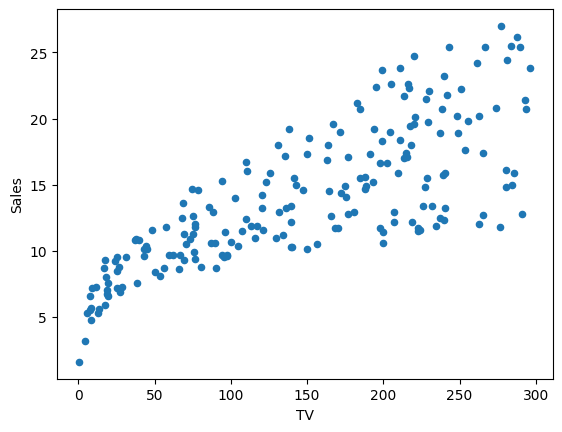

In [43]:
import matplotlib.pyplot as plt

data.plot(x='TV', y='Sales', kind='scatter')

# General steps in your model building
## 1. Preparing your x(independent values) and y(dependent value, Target) 

In [44]:
x = data['TV']
y = data['Sales']
print(x, y)

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


## 2. split the data into Train and test datas

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=12)
# print(x_test.shape)

## 3. Building a model

In [46]:
from sklearn.linear_model import LinearRegression
import numpy as np
regg = LinearRegression()
x_train = x_train[:, np.newaxis]
y_train = y_train[:, np.newaxis]
regg.fit(x_train, y_train)

C:\Users\lokanath\AppData\Local\Temp\ipykernel_2264\2566472988.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_train = x_train[:, np.newaxis]
C:\Users\lokanath\AppData\Local\Temp\ipykernel_2264\2566472988.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train = y_train[:, np.newaxis]


LinearRegression()

In [47]:
print(regg.intercept_)
print(regg.coef_)

[7.24347063]
[[0.04548552]]


In [48]:
# x_test = x_test[:, np.newaxis]
y_pred = regg.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
y

    Predicted
0   17.627815
1    9.799757
2    8.134987
3   18.041733
4   11.914833
5   17.009212
6   19.128837
7   11.664663
8   12.574373
9   12.710830
10  14.671256
11  14.903232
12   7.625549
13  13.670574
14  20.420625
15   9.199348
16  12.378786
17  10.327389
18  17.182056
19  16.031273
20  16.568002
21   8.057661
22  20.725378
23   9.954408
24  16.777235
25  11.810217
26  16.649876
27  11.259842
28   7.839331
29   8.407900
30  10.454748
31  20.325106
32  16.231409
33  18.655787
34   8.094050
35  15.653743
36  14.775873
37  16.290540
38   9.267576
39   7.639195 23     15.5
182     8.7
172     7.6
21     12.5
63     14.0
11     17.4
61     24.2
32      9.6
164    11.9
7      13.2
95     16.9
173    11.7
132     5.7
120    15.5
98     25.4
138     9.6
31     11.9
16     12.5
181    12.2
85     15.2
185    22.6
166     8.0
101    23.8
129     9.7
113    15.9
51     10.7
167    12.2
88     12.9
108     5.3
136     9.5
29     10.5
183    26.2
152    16.6
93     22.2
189     6.7
139   

C:\Users\lokanath\AppData\Local\Temp\ipykernel_2264\1249341732.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_test = x_test[:, np.newaxis]


In [50]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("MSE: "+str(mse))
print("R2 :"+ str(r_squared))

MSE: 9.084484553750142
R2 :0.7176344112762998


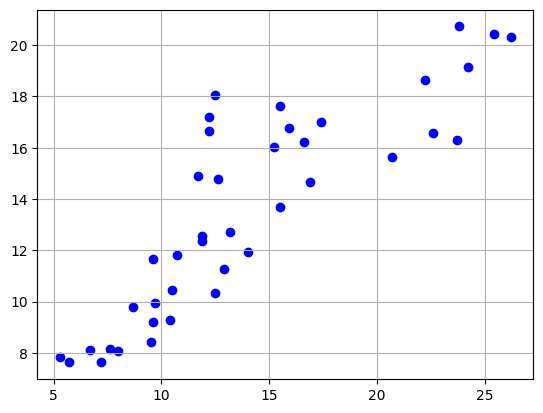

In [52]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, c='b')
plt.grid()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (160, 1) and (40, 1)

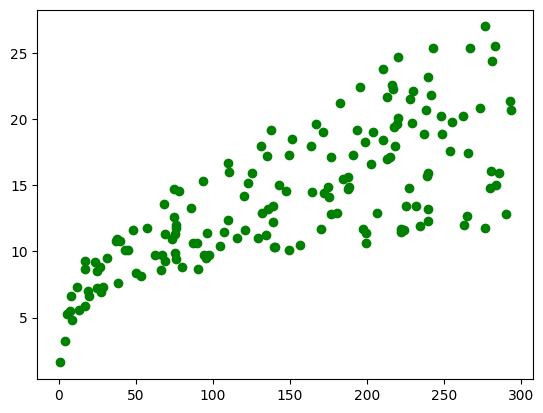

In [58]:
plt.scatter(x_train, y_train, c='g')
plt.plot(x_train, x_test, c='c')
plt.show()